<a href="https://colab.research.google.com/github/cybermin/2021_PNUAC_AIData/blob/main/09_codelab5_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🏷️ **코랩 환경에서 한글 폰트 사용하기**


---



In [1]:
#한글 폰트 사용설치
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

#한글 폰트 추가
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

#그래프에서 마이너스 기호가 표시
plt.rcParams['axes.unicode_minus'] = False  

import warnings
warnings.filterwarnings('ignore')

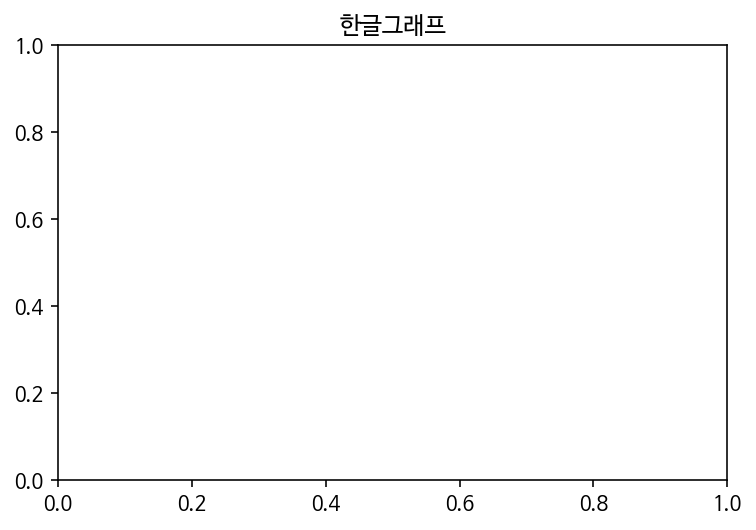

In [3]:
plt.title('한글그래프')
plt.show()

# 탐색적자료분석(Exploratory Data Analysis; EDA)
+ 수집된 데이터를 다양한 각도에서 관찰하고 이해하는 과정으로 데이터가 가지고 있는 특성을 이해하고 잠재적인 문제를 발견하는 과정

+ EDA의 주요 내용 : 데이터 분석에 앞서 데이터의 주요 특성을 요약 / 시각화
  + 관측치들의 패턴 탐색
  + 잘못된 자료들을 탐색 
  + 변수들간의 관계 파악



## 분석할 데이터 가져오기

In [4]:
import pandas as pd

&#9997; **pandas 노트 : 판다스 지수표현을 실수표현으로**


---
```
pd.options.display.float_format = '{:.2f}'.format
``` 
---

In [5]:
pd.options.display.float_format = '{:.2f}'.format

In [9]:
df21 = pd.read_excel('/content/drive/MyDrive/2021_AI/data/등록금 현황_2021.xlsx')
df20 = pd.read_excel('/content/drive/MyDrive/2021_AI/data/등록금 현황_2020.xlsx')

#2019년 단위 천원
df19 = pd.read_excel('/content/drive/MyDrive/2021_AI/data/등록금 현황_2019.xlsx')

## 전체적인 데이터 살펴보기
+ 데이터 항목의 개수, 속성 목록, NAN 값, 각 속성이 가지는 데이터형 등을 확인
+ 데이터 가공 과정에서 데이터의 오류나 누락이 없는지 데이터의 head와 tail을 확인
+ 데이터를 구성하는 각 속성값이 예측한 범위와 분포를 갖는지 확인

### 결측치 데이터 처리

&#9997; **pandas 노트 : 결측치 확인**


---
+ **결측값**
  + Null 값은 비어있는 값, 고급 언어로 결측값
  + pandas 에서는 NaN => Not a Number 로 표기 
+ **.isna()** , **.isnull()**
  + NaN 값 포함 여부를 Boolean 타입의 값으로 반환
  + 데이터프레임 전체에도 적용되고 각열에도 적용가능
  + 개수를 구하고 싶으면 sum()함수 사용
+ **.notna(), notnull()**
  + 비결측치 값 확인

+ **.dropna()**
  + 결측치를 제거
  + axis값 0이면 행, 1이면 열 삭제
  + how값이 'any' 이면 결측치가 하나라도 있으면 삭제할 것인지(any), 모든 값이 결측치여야 삭제할 것인지를(all) 결정
  + 참고) drop() : 결측치와 상관없이 삭제

+ **.fillna()**
  + 결측치 값을 대체
  + 특정열의 값에서 대체 하려면 fillna({열명:값})

+ **0을 null값으로 변경**
  + df.replace(0, np.NaN)
    + import numpy as np
---

In [10]:
 df21.head(2)

,기준연도,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학
0,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan
1,2021.00,대학교,사립,경남,기존,가야대학교(김해),120000.00,6758560.20,6758560.20,5849683.70,7206556.70,0.00,0.00,0.00


In [11]:
df21.isna()

,기준연도,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,False,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False,False,False,False,False,False,False,False
242,False,False,False,False,False,False,False,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df21.isna().sum()

기준연도    1
학교종류    1
설립구분    1
지역      1
상태      1
학교      1
입학금     1
수업료     1
등록금     1
인문사회    1
자연과학    1
예체능     1
공학      1
의학      1
dtype: int64

In [13]:
df21 = df21.fillna('-')
df21.head(2)

,기준연도,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학
0,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1,2021.00,대학교,사립,경남,기존,가야대학교(김해),120000.00,6758560.20,6758560.20,5849683.70,7206556.70,0.00,0.00,0.00


&#9997; **pandas 노트 : 행과 열 삭제**


---
+ **.drop(인덱스, axis옵션)**
  + axis가 '0' 이라면 행 삭제, '1' 이라면 열 삭제 
---

In [14]:
df21 = df21.drop(0)
df21.head(2)

,기준연도,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학
1,2021.00,대학교,사립,경남,기존,가야대학교(김해),120000.00,6758560.20,6758560.20,5849683.70,7206556.70,0.00,0.00,0.00
2,2021.00,대학교,사립,경기,기존,가천대학교,318000.00,8249738.70,8249738.70,7098467.30,8283509.90,9177055.60,9076000.00,9890000.00


In [15]:
df20.head(2)

,기준연도,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학
0,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan
1,2020.00,대학교,사립,경남,기존,가야대학교(김해),240000.00,6740785.50,6740785.50,5905715.60,7201165.10,0.00,0.00,0.00


In [16]:
df20 = df20.dropna()
df20.head(2)

,기준연도,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학
1,2020.00,대학교,사립,경남,기존,가야대학교(김해),240000.00,6740785.50,6740785.50,5905715.60,7201165.10,0.00,0.00,0.00
2,2020.00,대학교,사립,경기,기존,가천대학교,459000.00,8241328.60,8241328.60,7101494.10,8283820.90,9175040.50,9076000.00,9890000.00


In [18]:
df19.head(2)

,기준년도,학교종류,설립구분,지역,상태,학교,입학금\n(A),수업료\n(B),등록금\n(D=B),인문사회,자연과학,예체능,공학,의학
0,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan
1,2019.00,대학교,사립,경남,기존,가야대학교(김해),360.00,6717.70,6717.70,5973.30,7198.40,0.00,0.00,0.00


In [19]:
df19 = df19.drop(0)
df19.head(2)

,기준년도,학교종류,설립구분,지역,상태,학교,입학금\n(A),수업료\n(B),등록금\n(D=B),인문사회,자연과학,예체능,공학,의학
1,2019.00,대학교,사립,경남,기존,가야대학교(김해),360.00,6717.70,6717.70,5973.30,7198.40,0.00,0.00,0.00
2,2019.00,대학교,사립,경기,기존,가천대학교,601.00,8232.50,8232.50,7104.50,8274.80,9173.10,9076.00,9768.00


### 열 명 변경

&#9997; **pandas 노트 : 열명 변경**


---
+ **columns 속성**  
```
  df.columns = [열의 개수와 동일한 요소를 갖는 리스트]
```
---


+ 열명 조회

In [20]:
df21.columns

Index(['기준연도', '학교종류', '설립구분', '지역', '상태', '학교', '입학금 ', '수업료 ', '등록금 ',
       '인문사회', '자연과학', '예체능', '공학', '의학'],
      dtype='object')

In [21]:
df21['입학금 ']

1     120000.00
2     318000.00
3     154000.00
4          0.00
5     316600.00
         ...   
240   150000.00
241    94000.00
242   358400.00
243   358400.00
244   166000.00
Name: 입학금 , Length: 244, dtype: object

In [22]:
col =  [item.strip() for item in df21.columns]
col

['기준연도',
 '학교종류',
 '설립구분',
 '지역',
 '상태',
 '학교',
 '입학금',
 '수업료',
 '등록금',
 '인문사회',
 '자연과학',
 '예체능',
 '공학',
 '의학']

+ 열명 수정

In [24]:
df21.columns = col
df20.columns = col
df19.columns = col

In [25]:
df21.columns

Index(['기준연도', '학교종류', '설립구분', '지역', '상태', '학교', '입학금', '수업료', '등록금', '인문사회',
       '자연과학', '예체능', '공학', '의학'],
      dtype='object')

In [26]:
df19.head(2)

,기준연도,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학
1,2019.00,대학교,사립,경남,기존,가야대학교(김해),360.00,6717.70,6717.70,5973.30,7198.40,0.00,0.00,0.00
2,2019.00,대학교,사립,경기,기존,가천대학교,601.00,8232.50,8232.50,7104.50,8274.80,9173.10,9076.00,9768.00


### 열 값 수정

&#9997; **pandas 노트 : 특정 자료 추출 및 변경**


---
+ df.loc[행인덱스, 열인덱스]
  + 특정 열 가져오기 : df.loc[:, 열인덱스]
  + 특정 행 가져오기 : df.loc[행인덱스, :]
  + 특정 항목 가져오기 : df.loc[행인덱스, 열인덱스]
+ 열의 내용 변경
```
df[열명] = 변경값
```



---



In [27]:
df19['입학금']*1000

1     360000.00
2     601000.00
3     462000.00
4     300000.00
5     598000.00
         ...   
241   450000.00
242   282000.00
243   677000.00
244   677000.00
245   300000.00
Name: 입학금, Length: 245, dtype: float64

In [28]:
df19['입학금'] =  df19['입학금'] * 1000

In [30]:
df19.loc[:, '수업료':'의학'] = df19.loc[:, '수업료':'의학'] * 1000

In [31]:
df19.head(2)

,기준연도,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학
1,2019.00,대학교,사립,경남,기존,가야대학교(김해),360000.00,6717700.00,6717700.00,5973300.00,7198400.00,0.00,0.00,0.00
2,2019.00,대학교,사립,경기,기존,가천대학교,601000.00,8232500.00,8232500.00,7104500.00,8274800.00,9173100.00,9076000.00,9768000.00


In [32]:
df20.head(2)

,기준연도,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학
1,2020.00,대학교,사립,경남,기존,가야대학교(김해),240000.00,6740785.50,6740785.50,5905715.60,7201165.10,0.00,0.00,0.00
2,2020.00,대학교,사립,경기,기존,가천대학교,459000.00,8241328.60,8241328.60,7101494.10,8283820.90,9175040.50,9076000.00,9890000.00


In [33]:
df21.head(2)

,기준연도,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학
1,2021.00,대학교,사립,경남,기존,가야대학교(김해),120000.00,6758560.20,6758560.20,5849683.70,7206556.70,0.00,0.00,0.00
2,2021.00,대학교,사립,경기,기존,가천대학교,318000.00,8249738.70,8249738.70,7098467.30,8283509.90,9177055.60,9076000.00,9890000.00


&#9997; **pandas 노트 : 데이터프레임 합치기**


---
+ df.append(추가데이터프레임)
+ pd.concat([df1, df2, ....])


---



In [35]:
df = df19.append(df20).append(df21)
df.head()

,기준연도,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학
1,2019.00,대학교,사립,경남,기존,가야대학교(김해),360000.00,6717700.00,6717700.00,5973300.00,7198400.00,0.00,0.00,0.00
2,2019.00,대학교,사립,경기,기존,가천대학교,601000.00,8232500.00,8232500.00,7104500.00,8274800.00,9173100.00,9076000.00,9768000.00
3,2019.00,대학교,사립,강원,기존,가톨릭관동대학교,462000.00,7183400.00,7183400.00,6157400.00,7438700.00,8214300.00,8135400.00,9850000.00
4,2019.00,대학교,사립,충북,기존,가톨릭꽃동네대학교,300000.00,7054300.00,7054300.00,6618000.00,7796000.00,0.00,0.00,0.00
5,2019.00,대학교,사립,경기,기존,가톨릭대학교,598000.00,6919800.00,6919800.00,6122000.00,7457400.00,8562000.00,8284000.00,0.00


In [36]:
df2 = pd.concat([df19, df20, df21])
df2.head()

,기준연도,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학
1,2019.00,대학교,사립,경남,기존,가야대학교(김해),360000.00,6717700.00,6717700.00,5973300.00,7198400.00,0.00,0.00,0.00
2,2019.00,대학교,사립,경기,기존,가천대학교,601000.00,8232500.00,8232500.00,7104500.00,8274800.00,9173100.00,9076000.00,9768000.00
3,2019.00,대학교,사립,강원,기존,가톨릭관동대학교,462000.00,7183400.00,7183400.00,6157400.00,7438700.00,8214300.00,8135400.00,9850000.00
4,2019.00,대학교,사립,충북,기존,가톨릭꽃동네대학교,300000.00,7054300.00,7054300.00,6618000.00,7796000.00,0.00,0.00,0.00
5,2019.00,대학교,사립,경기,기존,가톨릭대학교,598000.00,6919800.00,6919800.00,6122000.00,7457400.00,8562000.00,8284000.00,0.00


### 열 데이터 타입 변경

&#9997; **pandas 노트 : 데이터 정보 확인**


---
+ **df.info()**
  + 데이터에 대한 전반적인 정보
  + 행과 열의 크기, 컬럼명, 컬럼을 구성하는 값의 자료형 등을 출력  
+ **df.shape**
  + 데이터의 (행, 열) 크기를 확인
+ **df.describe()**
  + 데이터의 컬럼별 요약 통계량
  + mean(), max(), median()등 개별 함수를 사용하여 통계량을 계산가능
  + 범주형 데이터 요약 : include='O' 


---



In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 1 to 244
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준연도    733 non-null    object
 1   학교종류    733 non-null    object
 2   설립구분    733 non-null    object
 3   지역      733 non-null    object
 4   상태      733 non-null    object
 5   학교      733 non-null    object
 6   입학금     733 non-null    object
 7   수업료     733 non-null    object
 8   등록금     733 non-null    object
 9   인문사회    733 non-null    object
 10  자연과학    733 non-null    object
 11  예체능     733 non-null    object
 12  공학      733 non-null    object
 13  의학      733 non-null    object
dtypes: object(14)
memory usage: 85.9+ KB


In [38]:
df.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            235, 236, 237, 238, 239, 240, 241, 242, 243, 244],
           dtype='int64', length=733)

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 1 to 244
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준연도    733 non-null    object
 1   학교종류    733 non-null    object
 2   설립구분    733 non-null    object
 3   지역      733 non-null    object
 4   상태      733 non-null    object
 5   학교      733 non-null    object
 6   입학금     733 non-null    object
 7   수업료     733 non-null    object
 8   등록금     733 non-null    object
 9   인문사회    733 non-null    object
 10  자연과학    733 non-null    object
 11  예체능     733 non-null    object
 12  공학      733 non-null    object
 13  의학      733 non-null    object
dtypes: object(14)
memory usage: 85.9+ KB


&#9997; **pandas 노트 : 열 타입 변경**


---
+ df.dtypes : 데이터타입 확인
+ df.astype(변환타입) : 전체 열을 변환
+ df.astype({열:변환타입}) : 해당 열을 변환
  + pd.to_numeric(열): 문자열 칼럼의 숫자형 변환 
  + pd.to_datetime(열) : 날짜형식으로 변경


---



In [45]:
df2['기준연도'] = pd.to_numeric(df2['기준연도'], downcast='integer')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 1 to 244
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준연도    733 non-null    int16 
 1   학교종류    733 non-null    object
 2   설립구분    733 non-null    object
 3   지역      733 non-null    object
 4   상태      733 non-null    object
 5   학교      733 non-null    object
 6   입학금     733 non-null    object
 7   수업료     733 non-null    object
 8   등록금     733 non-null    object
 9   인문사회    733 non-null    object
 10  자연과학    733 non-null    object
 11  예체능     733 non-null    object
 12  공학      733 non-null    object
 13  의학      733 non-null    object
dtypes: int16(1), object(13)
memory usage: 81.6+ KB


In [41]:
df = df.astype({'기준연도':int})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 1 to 244
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준연도    733 non-null    int64 
 1   학교종류    733 non-null    object
 2   설립구분    733 non-null    object
 3   지역      733 non-null    object
 4   상태      733 non-null    object
 5   학교      733 non-null    object
 6   입학금     733 non-null    object
 7   수업료     733 non-null    object
 8   등록금     733 non-null    object
 9   인문사회    733 non-null    object
 10  자연과학    733 non-null    object
 11  예체능     733 non-null    object
 12  공학      733 non-null    object
 13  의학      733 non-null    object
dtypes: int64(1), object(13)
memory usage: 85.9+ KB


In [46]:
df.loc[:,'입학금':'의학'] = df.loc[:, '입학금':'의학'].astype(float)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 1 to 244
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준연도    733 non-null    int64  
 1   학교종류    733 non-null    object 
 2   설립구분    733 non-null    object 
 3   지역      733 non-null    object 
 4   상태      733 non-null    object 
 5   학교      733 non-null    object 
 6   입학금     733 non-null    float64
 7   수업료     733 non-null    float64
 8   등록금     733 non-null    float64
 9   인문사회    733 non-null    float64
 10  자연과학    733 non-null    float64
 11  예체능     733 non-null    float64
 12  공학      733 non-null    float64
 13  의학      733 non-null    float64
dtypes: float64(8), int64(1), object(5)
memory usage: 85.9+ KB


 &#9997; **pandas 노트 : 데이터프레임의 인덱스**


---
+ 열의 인덱스 : **df.colums**
+ 행의 인덱스 : **df.index**
+ **데이터프레임의 인덱스 변경**
  - 열인덱스 명 변경 : df.column = [열명인덱스]
  - 열항목 중 하나를 인덱스로 사용 : df.set_index(열명)
  - 인덱스를 일반 데이터 열로 전환 : df.reset_index()
---



In [48]:
df.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            235, 236, 237, 238, 239, 240, 241, 242, 243, 244],
           dtype='int64', length=733)

In [49]:
df = df.reset_index()
df.head(2)

,index,기준연도,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학
0,1,2019,대학교,사립,경남,기존,가야대학교(김해),360000.00,6717700.00,6717700.00,5973300.00,7198400.00,0.00,0.00,0.00
1,2,2019,대학교,사립,경기,기존,가천대학교,601000.00,8232500.00,8232500.00,7104500.00,8274800.00,9173100.00,9076000.00,9768000.00


In [51]:
df.index

RangeIndex(start=0, stop=733, step=1)

In [52]:
df = df.drop('index', axis=1)
df.head(2)

,기준연도,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학
0,2019,대학교,사립,경남,기존,가야대학교(김해),360000.00,6717700.00,6717700.00,5973300.00,7198400.00,0.00,0.00,0.00
1,2019,대학교,사립,경기,기존,가천대학교,601000.00,8232500.00,8232500.00,7104500.00,8274800.00,9173100.00,9076000.00,9768000.00


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준연도    733 non-null    int64  
 1   학교종류    733 non-null    object 
 2   설립구분    733 non-null    object 
 3   지역      733 non-null    object 
 4   상태      733 non-null    object 
 5   학교      733 non-null    object 
 6   입학금     733 non-null    float64
 7   수업료     733 non-null    float64
 8   등록금     733 non-null    float64
 9   인문사회    733 non-null    float64
 10  자연과학    733 non-null    float64
 11  예체능     733 non-null    float64
 12  공학      733 non-null    float64
 13  의학      733 non-null    float64
dtypes: float64(8), int64(1), object(5)
memory usage: 80.3+ KB


### 범주형 자료형

&#9997; **pandas 노트 : 각 열의 범주형 자료 분석**


---
+ **df.drop_duplicates()** : 중복값은 모두 제거하고 유일한 값만 표시
+ **df.unique()**: 각 열 내에 유일한 값을 확인
+ **df.value_counts()** : 각 열 내에 각각의 값이 나온 횟수 


---



In [54]:
df['학교종류']

0            대학교
1            대학교
2            대학교
3            대학교
4            대학교
         ...    
728          대학교
729         산업대학
730          대학교
731          대학교
732    사이버대학(대학)
Name: 학교종류, Length: 733, dtype: object

In [55]:
df['학교종류'].drop_duplicates()

0            대학교
17     사이버대학(대학)
29          교육대학
132     각종학교(대학)
180         기술대학
193         산업대학
212       방송통신대학
Name: 학교종류, dtype: object

In [56]:
df['설립구분'].unique()

array(['사립', '국립', '특별법법인', '국립대법인', '공립', '특별법국립'], dtype=object)

In [ ]:
df['지역'].value_counts()

서울    168
경기    109
경북     57
충남     54
부산     49
대전     39
충북     38
강원     36
광주     33
경남     33
전북     33
전남     33
인천     18
대구     12
세종      9
제주      6
울산      6
Name: 지역, dtype: int64

In [57]:
df['학교종류'].unique()

array(['대학교', '사이버대학(대학)', '교육대학', '각종학교(대학)', '기술대학', '산업대학', '방송통신대학'],
      dtype=object)

In [59]:
df[df['학교종류']=='각종학교(대학)']

,기준연도,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학
132,2019,각종학교(대학),사립,충북,기존,순복음총회신학교,500000.00,5489600.00,5489600.00,5235200.00,0.00,7000000.00,0.00,0.00
216,2019,각종학교(대학),특별법국립,서울,기존,한국예술종합학교,0.00,4806500.00,4806500.00,0.00,0.00,4806500.00,0.00,0.00
377,2020,각종학교(대학),사립,충북,기존,순복음총회신학교,500000.00,5542284.00,5542284.00,5313214.30,0.00,7000000.00,0.00,0.00
460,2020,각종학교(대학),특별법국립,서울,기존,한국예술종합학교,0.00,4806454.70,4806454.70,0.00,0.00,4806454.70,0.00,0.00
620,2021,각종학교(대학),사립,충북,기존,순복음총회신학교,500000.00,5605779.20,5605779.20,5385639.10,0.00,7000000.00,0.00,0.00
704,2021,각종학교(대학),특별법국립,서울,기존,한국예술종합학교,0.00,4806454.70,4806454.70,0.00,0.00,4806454.70,0.00,0.00


* **조건에 맞는 행을 찾아 삭제**

In [60]:
df = df.drop(df[df['학교종류'] == '각종학교(대학)'].index)

In [61]:
df['학교종류'].unique()

array(['대학교', '사이버대학(대학)', '교육대학', '기술대학', '산업대학', '방송통신대학'], dtype=object)

&#9997; **pandas 노트 : 조건에 맞는 자료 추출**


---
+ df[조건식]
  + 시리즈.isin([리스트])
  + and 연산 : &
  + or 연산 : | 
  + and 연산이나 or연산인 경우는 반드시 ()로 묶어서 사용



---

In [62]:
df[df['학교종류'] == '방송통신대학']

,기준연도,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학
212,2019,방송통신대학,국립,서울,기존,한국방송통신대학교,0.00,755600.00,755600.00,732400.00,732000.00,0.00,2183300.00,0.00
456,2020,방송통신대학,국립,서울,기존,한국방송통신대학교,0.00,756111.70,756111.70,731424.10,731600.00,0.00,2184714.30,0.00
700,2021,방송통신대학,국립,서울,기존,한국방송통신대학교,0.00,758602.80,758602.80,731600.70,731600.00,757600.00,2214000.00,0.00


In [63]:
df[(df['학교종류'] == '방송통신대학') | (df['학교종류'] == '사이버대학(대학)')]

,기준연도,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학
17,2019,사이버대학(대학),사립,대전,기존,건양사이버대학교,300000.00,2437000.00,2437000.00,2427300.00,2476900.00,0.00,0.00,0.00
33,2019,사이버대학(대학),사립,서울,기존,경희사이버대학교,300000.00,2796600.00,2796600.00,2799200.00,0.00,0.00,2764300.00,0.00
37,2019,사이버대학(대학),사립,서울,기존,고려사이버대학교,100000.00,2223800.00,2223800.00,2222500.00,0.00,0.00,2226300.00,0.00
49,2019,사이버대학(대학),사립,경기,기존,국제사이버대학교,200000.00,2545100.00,2545100.00,2435500.00,0.00,3033800.00,0.00,0.00
52,2019,사이버대학(대학),사립,충남,기존,글로벌사이버대학교,300000.00,2444100.00,2444100.00,2436900.00,0.00,2465200.00,0.00,0.00
65,2019,사이버대학(대학),사립,경북,기존,대구사이버대학교,200000.00,2411400.00,2411400.00,2414200.00,2407800.00,0.00,0.00,0.00
83,2019,사이버대학(대학),사립,서울,기존,디지털서울문화예술대학교,300000.00,2648300.00,2648300.00,2641400.00,0.00,2652400.00,0.00,0.00
97,2019,사이버대학(대학),사립,부산,기존,부산디지털대학교,200000.00,2417500.00,2417500.00,2416700.00,0.00,0.00,2450000.00,0.00
100,2019,사이버대학(대학),사립,서울,기존,사이버한국외국어대학교,300000.00,2770700.00,2770700.00,2770700.00,0.00,0.00,0.00,0.00
111,2019,사이버대학(대학),사립,서울,기존,서울디지털대학교,300000.00,2089400.00,2089400.00,2091000.00,0.00,2086900.00,0.00,0.00


In [64]:
df[df['학교종류'].isin(['사이버대학(대학)', '방송통신대학'])]

,기준연도,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학
17,2019,사이버대학(대학),사립,대전,기존,건양사이버대학교,300000.00,2437000.00,2437000.00,2427300.00,2476900.00,0.00,0.00,0.00
33,2019,사이버대학(대학),사립,서울,기존,경희사이버대학교,300000.00,2796600.00,2796600.00,2799200.00,0.00,0.00,2764300.00,0.00
37,2019,사이버대학(대학),사립,서울,기존,고려사이버대학교,100000.00,2223800.00,2223800.00,2222500.00,0.00,0.00,2226300.00,0.00
49,2019,사이버대학(대학),사립,경기,기존,국제사이버대학교,200000.00,2545100.00,2545100.00,2435500.00,0.00,3033800.00,0.00,0.00
52,2019,사이버대학(대학),사립,충남,기존,글로벌사이버대학교,300000.00,2444100.00,2444100.00,2436900.00,0.00,2465200.00,0.00,0.00
65,2019,사이버대학(대학),사립,경북,기존,대구사이버대학교,200000.00,2411400.00,2411400.00,2414200.00,2407800.00,0.00,0.00,0.00
83,2019,사이버대학(대학),사립,서울,기존,디지털서울문화예술대학교,300000.00,2648300.00,2648300.00,2641400.00,0.00,2652400.00,0.00,0.00
97,2019,사이버대학(대학),사립,부산,기존,부산디지털대학교,200000.00,2417500.00,2417500.00,2416700.00,0.00,0.00,2450000.00,0.00
100,2019,사이버대학(대학),사립,서울,기존,사이버한국외국어대학교,300000.00,2770700.00,2770700.00,2770700.00,0.00,0.00,0.00,0.00
111,2019,사이버대학(대학),사립,서울,기존,서울디지털대학교,300000.00,2089400.00,2089400.00,2091000.00,0.00,2086900.00,0.00,0.00


### 열 추가

&#9997; **pandas 노트 : 새로운 열 추가**


---
 
+ df[새로운열명] = 값
+ 시리즈.map(딕션너리) : 해당 시리즈의 내용에 매핑할 값을 딕셔너리 형태로 지정
---

In [66]:
df['온라인'] = ['on' if item in ['사이버대학(대학)', '방송통신대학'] else 'off' for item in list(df['학교종류'])]
df.head(2)

,기준연도,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학,온라인
0,2019,대학교,사립,경남,기존,가야대학교(김해),360000.00,6717700.00,6717700.00,5973300.00,7198400.00,0.00,0.00,0.00,off
1,2019,대학교,사립,경기,기존,가천대학교,601000.00,8232500.00,8232500.00,7104500.00,8274800.00,9173100.00,9076000.00,9768000.00,off


In [67]:
df['설립구분'].unique()

array(['사립', '국립', '특별법법인', '국립대법인', '공립', '특별법국립'], dtype=object)

In [68]:
df['사립구분'] = df['설립구분'].map({'사립':'사립', '국립':'국공립', '특별법법인':'국공립', '국립대법인':'국공립', '곡립':'국공립', '특별법국립':'국공립'})
df.head(2)

,기준연도,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학,온라인,사립구분
0,2019,대학교,사립,경남,기존,가야대학교(김해),360000.00,6717700.00,6717700.00,5973300.00,7198400.00,0.00,0.00,0.00,off,사립
1,2019,대학교,사립,경기,기존,가천대학교,601000.00,8232500.00,8232500.00,7104500.00,8274800.00,9173100.00,9076000.00,9768000.00,off,사립


In [69]:
df.columns

Index(['기준연도', '학교종류', '설립구분', '지역', '상태', '학교', '입학금', '수업료', '등록금', '인문사회',
       '자연과학', '예체능', '공학', '의학', '온라인', '사립구분'],
      dtype='object')

In [70]:
df.describe()

,기준연도,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학
count,727.00,727.00,727.00,727.00,727.00,727.00,727.00,727.00,727.00
mean,2020.00,250839.80,6158434.03,6158434.03,5133392.64,5030428.61,5342026.17,4952468.01,1869250.51
std,0.82,196753.65,2014774.27,2014774.27,2037138.30,3326566.65,3500365.54,3649975.27,3889482.51
min,2019.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2019.00,95000.00,4361705.80,4361705.80,3438000.00,731600.00,2135562.05,0.00,0.00
50%,2020.00,255000.00,6912238.00,6912238.00,5896173.30,6812000.00,7056000.00,6866000.00,0.00
75%,2021.00,404500.00,7551300.00,7551300.00,6652000.00,7838600.00,8278524.75,8150000.00,0.00
max,2021.00,696000.00,10387666.70,10387666.70,8464600.00,10522000.00,9923962.40,9763860.70,12896000.00


+ .describe()의 include 옵션 값 : 범주형 자료형 요약
  + 'all' : 모든 열에 대해 요약
  + None : 수치형 열만 요약 (생략하면 기본값)
  + 'O' : 범주형 열 요약

In [82]:
df.describe(include = 'O')

,학교종류,설립구분,지역,상태,학교,온라인,사립구분
count,727,727,727,727,727,727,724
unique,6,6,17,4,244,2,2
top,대학교,사립,서울,기존,목포대학교,off,사립
freq,634,580,165,722,3,673,580


### 범주형 자료 시각화

In [83]:
import seaborn as sns

In [86]:
def snsCountplot(col) :
  plt.figure(figsize(8, 6))
  sns.countplot(x = '사립구분', hue=col, data=df)
  plt.legend(loc='upper right')
  plt.show()

In [87]:
snsCountplot('학교종류' )

NameError: ignored

In [76]:
snsCountplot('온라인' )

NameError: ignored

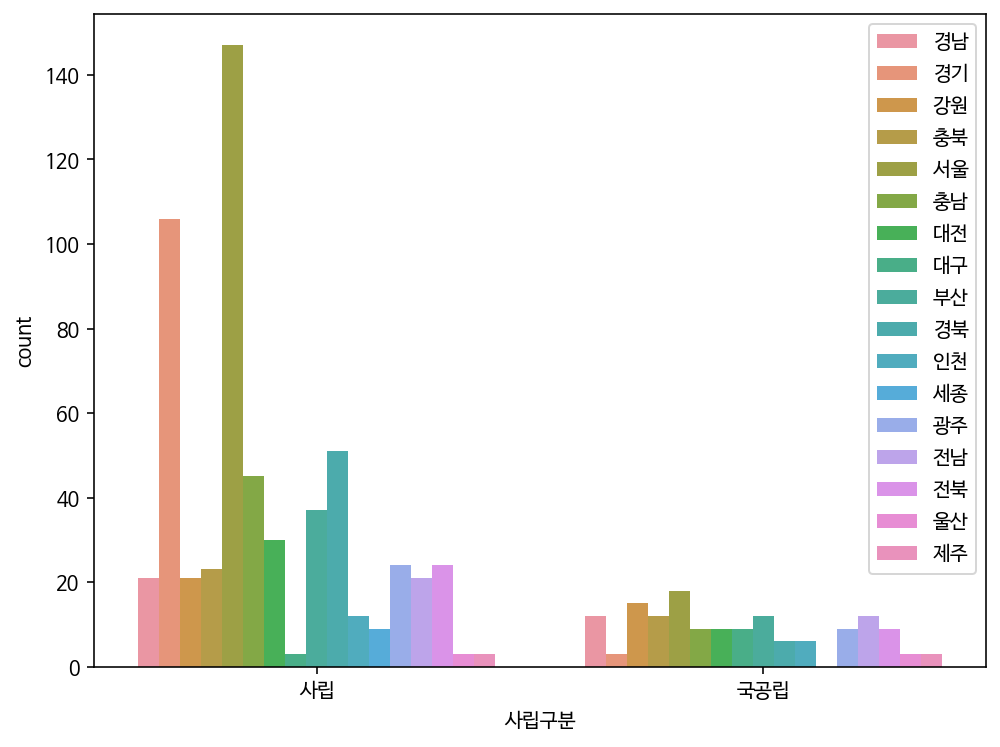

In [ ]:
snsCountplot('지역' )

### 수치형 자료형

In [88]:
df.describe()

,기준연도,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학
count,727.00,727.00,727.00,727.00,727.00,727.00,727.00,727.00,727.00
mean,2020.00,250839.80,6158434.03,6158434.03,5133392.64,5030428.61,5342026.17,4952468.01,1869250.51
std,0.82,196753.65,2014774.27,2014774.27,2037138.30,3326566.65,3500365.54,3649975.27,3889482.51
min,2019.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2019.00,95000.00,4361705.80,4361705.80,3438000.00,731600.00,2135562.05,0.00,0.00
50%,2020.00,255000.00,6912238.00,6912238.00,5896173.30,6812000.00,7056000.00,6866000.00,0.00
75%,2021.00,404500.00,7551300.00,7551300.00,6652000.00,7838600.00,8278524.75,8150000.00,0.00
max,2021.00,696000.00,10387666.70,10387666.70,8464600.00,10522000.00,9923962.40,9763860.70,12896000.00


In [89]:
descol = [ '입학금', '수업료', '등록금', '인문사회', '자연과학', '예체능', '공학', '의학']
df[descol].describe()

,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학
count,727.00,727.00,727.00,727.00,727.00,727.00,727.00,727.00
mean,250839.80,6158434.03,6158434.03,5133392.64,5030428.61,5342026.17,4952468.01,1869250.51
std,196753.65,2014774.27,2014774.27,2037138.30,3326566.65,3500365.54,3649975.27,3889482.51
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,95000.00,4361705.80,4361705.80,3438000.00,731600.00,2135562.05,0.00,0.00
50%,255000.00,6912238.00,6912238.00,5896173.30,6812000.00,7056000.00,6866000.00,0.00
75%,404500.00,7551300.00,7551300.00,6652000.00,7838600.00,8278524.75,8150000.00,0.00
max,696000.00,10387666.70,10387666.70,8464600.00,10522000.00,9923962.40,9763860.70,12896000.00


In [90]:
df[df['등록금']==0]

,기준연도,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학,온라인,사립구분
43,2019,대학교,사립,전남,기존,광주가톨릭대학교,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,off,사립
62,2019,대학교,특별법법인,대구,기존,대구경북과학기술원,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,off,국공립
180,2019,기술대학,사립,서울,기존,정석대학,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,off,사립
288,2020,대학교,사립,전남,기존,광주가톨릭대학교,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,off,사립
424,2020,기술대학,사립,서울,기존,정석대학,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,off,사립
532,2021,대학교,사립,전남,기존,광주가톨릭대학교,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,off,사립
668,2021,기술대학,사립,서울,기존,정석대학,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,off,사립


In [91]:
df = df.drop(df[df['등록금']==0].index)

In [92]:
df[descol].describe()

,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학
count,720.00,720.00,720.00,720.00,720.00,720.00,720.00,720.00
mean,253278.52,6218307.70,6218307.70,5183300.63,5079335.55,5393962.54,5000617.01,1887423.78
std,196138.61,1930286.28,1930286.28,1982747.40,3305302.04,3477256.71,3634681.91,3903973.48
min,0.00,755600.00,755600.00,0.00,0.00,0.00,0.00,0.00
25%,99800.00,4448899.45,4448899.45,3441690.85,2060000.00,2684202.78,0.00,0.00
50%,269000.00,6919947.25,6919947.25,5906007.80,6839944.75,7072000.00,6888000.00,0.00
75%,405600.00,7565217.00,7565217.00,6652500.00,7840000.00,8281167.23,8174089.28,0.00
max,696000.00,10387666.70,10387666.70,8464600.00,10522000.00,9923962.40,9763860.70,12896000.00


In [93]:
df[descol].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 732
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   입학금     720 non-null    float64
 1   수업료     720 non-null    float64
 2   등록금     720 non-null    float64
 3   인문사회    720 non-null    float64
 4   자연과학    720 non-null    float64
 5   예체능     720 non-null    float64
 6   공학      720 non-null    float64
 7   의학      720 non-null    float64
dtypes: float64(8)
memory usage: 50.6 KB


### 수치형 데이터 분석 후 결측치로 변경

+ 0인 값을 평균에 반영되지 않도록 NULL 값으로 변경

 &#9997; **numpy**


---
+ Pandas, Scikit-learn, Tensorflow등 데이터 사이언스 분야에서 사용되는 라이브러리들의 토대가 되는 라이브러리
+ 동일한 데이터 타입을 가지는 다차원 배열로 연속된 메모리 공간이 할당됨 
+ 모듈 추가 
```python
import numpy as np
```
+ **다차원 배열을 생성**
```
np.array()
``` 
+ 속성
  + ndarray.shape : 배열의 차원. 각 차원의 배열의 크기를 나타내는 정수의 튜플  
  + ndarray.size : 배열의 요수의 총 개수. shape 튜플의 요소의 곱과 같음

---

In [94]:
import numpy as np
df = df.replace(0, np.NaN)

In [95]:
df[descol].describe()

,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학
count,555.00,720.00,720.00,682.00,546.00,548.00,509.00,140.00
mean,328577.54,6218307.70,6218307.70,5472106.23,6698024.91,7086958.08,7073564.33,9706750.86
std,158561.99,1930286.28,1930286.28,1602485.14,1884434.91,1968048.10,2001532.34,1546053.28
min,42000.00,755600.00,755600.00,731424.10,731600.00,757600.00,2060000.00,5602000.00
25%,200000.00,4448899.45,4448899.45,3604160.00,5679000.00,6418333.33,5580000.00,9158500.00
50%,308000.00,6919947.25,6919947.25,5960861.95,7382188.45,7778950.00,7781471.40,9850000.00
75%,446000.00,7565217.00,7565217.00,6698562.50,7970933.10,8460197.10,8400000.00,10662000.00
max,696000.00,10387666.70,10387666.70,8464600.00,10522000.00,9923962.40,9763860.70,12896000.00


In [96]:
df.head()

,기준연도,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학,온라인,사립구분
0,2019,대학교,사립,경남,기존,가야대학교(김해),360000.00,6717700.00,6717700.00,5973300.00,7198400.00,nan,nan,nan,off,사립
1,2019,대학교,사립,경기,기존,가천대학교,601000.00,8232500.00,8232500.00,7104500.00,8274800.00,9173100.00,9076000.00,9768000.00,off,사립
2,2019,대학교,사립,강원,기존,가톨릭관동대학교,462000.00,7183400.00,7183400.00,6157400.00,7438700.00,8214300.00,8135400.00,9850000.00,off,사립
3,2019,대학교,사립,충북,기존,가톨릭꽃동네대학교,300000.00,7054300.00,7054300.00,6618000.00,7796000.00,nan,nan,nan,off,사립
4,2019,대학교,사립,경기,기존,가톨릭대학교,598000.00,6919800.00,6919800.00,6122000.00,7457400.00,8562000.00,8284000.00,nan,off,사립


In [97]:
df[descol].describe()

,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학
count,555.00,720.00,720.00,682.00,546.00,548.00,509.00,140.00
mean,328577.54,6218307.70,6218307.70,5472106.23,6698024.91,7086958.08,7073564.33,9706750.86
std,158561.99,1930286.28,1930286.28,1602485.14,1884434.91,1968048.10,2001532.34,1546053.28
min,42000.00,755600.00,755600.00,731424.10,731600.00,757600.00,2060000.00,5602000.00
25%,200000.00,4448899.45,4448899.45,3604160.00,5679000.00,6418333.33,5580000.00,9158500.00
50%,308000.00,6919947.25,6919947.25,5960861.95,7382188.45,7778950.00,7781471.40,9850000.00
75%,446000.00,7565217.00,7565217.00,6698562.50,7970933.10,8460197.10,8400000.00,10662000.00
max,696000.00,10387666.70,10387666.70,8464600.00,10522000.00,9923962.40,9763860.70,12896000.00


In [98]:
df.loc[:, descol]

,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학
0,360000.00,6717700.00,6717700.00,5973300.00,7198400.00,nan,nan,nan
1,601000.00,8232500.00,8232500.00,7104500.00,8274800.00,9173100.00,9076000.00,9768000.00
2,462000.00,7183400.00,7183400.00,6157400.00,7438700.00,8214300.00,8135400.00,9850000.00
3,300000.00,7054300.00,7054300.00,6618000.00,7796000.00,nan,nan,nan
4,598000.00,6919800.00,6919800.00,6122000.00,7457400.00,8562000.00,8284000.00,nan
...,...,...,...,...,...,...,...,...
728,150000.00,7724277.60,7724277.60,6825340.80,7733012.90,8219724.70,8264385.00,nan
729,94000.00,6929052.00,6929052.00,5814127.50,7148930.20,7484849.10,6999745.60,nan
730,358400.00,8315003.90,8315003.90,6848000.00,6848000.00,9070658.50,8810861.60,nan
731,358400.00,8443408.10,8443408.10,6848000.00,nan,8984000.00,8799536.40,nan


In [99]:
df.head(2)

,기준연도,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학,온라인,사립구분
0,2019,대학교,사립,경남,기존,가야대학교(김해),360000.00,6717700.00,6717700.00,5973300.00,7198400.00,nan,nan,nan,off,사립
1,2019,대학교,사립,경기,기존,가천대학교,601000.00,8232500.00,8232500.00,7104500.00,8274800.00,9173100.00,9076000.00,9768000.00,off,사립


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 732
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준연도    720 non-null    int64  
 1   학교종류    720 non-null    object 
 2   설립구분    720 non-null    object 
 3   지역      720 non-null    object 
 4   상태      720 non-null    object 
 5   학교      720 non-null    object 
 6   입학금     555 non-null    float64
 7   수업료     720 non-null    float64
 8   등록금     720 non-null    float64
 9   인문사회    682 non-null    float64
 10  자연과학    546 non-null    float64
 11  예체능     548 non-null    float64
 12  공학      509 non-null    float64
 13  의학      140 non-null    float64
 14  온라인     720 non-null    object 
 15  사립구분    717 non-null    object 
dtypes: float64(8), int64(1), object(7)
memory usage: 95.6+ KB


### 수치형 자료형 시각화

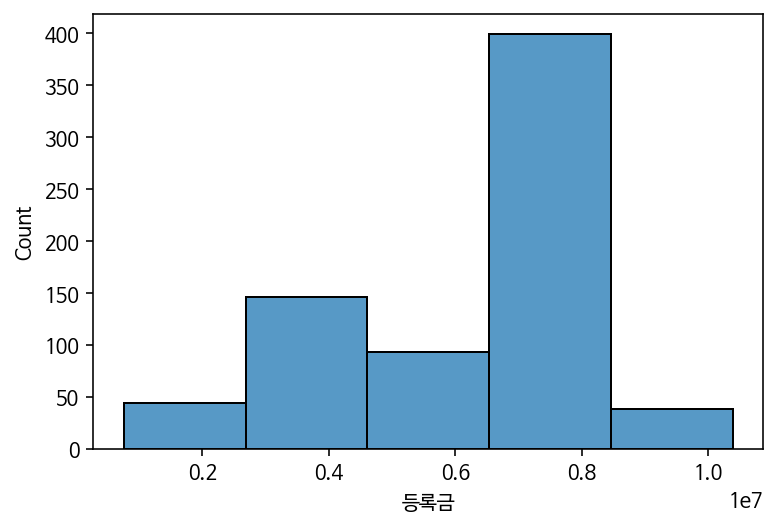

In [103]:
sns.histplot(x=df['등록금'], bins=5)
plt.show()

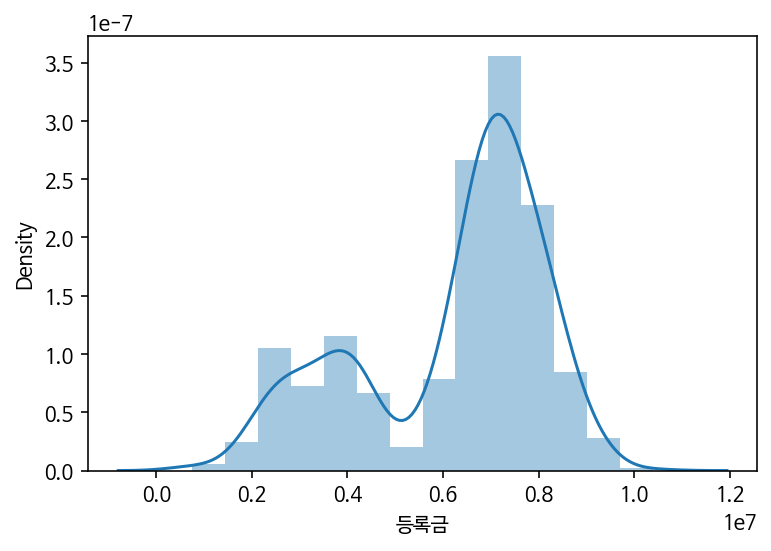

In [104]:
sns.distplot(df['등록금'], kde = True) 
plt.show()

## 시각화를 이용한 데이터 분포 확인
+ 범주형 : bar
+ 수치형
  + 이산형 : bar
  + 연속형 : kdeplot, histogram
+ 범주형 + 수치형 : boxplot, violinplot, etc
+ 수치형 + 수치형 : scatter
+ 범주형 + 범주형 : heatmap

### 범주형 + 수치형

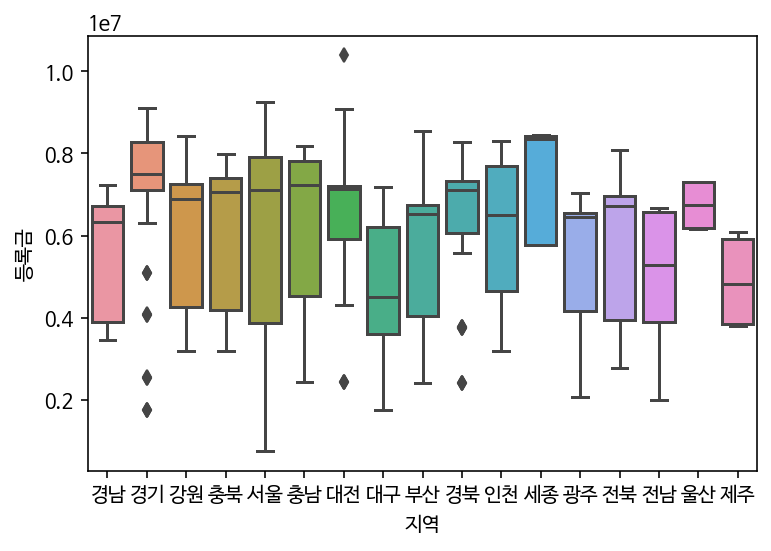

In [105]:
sns.boxplot(x='지역', y='등록금', data=df)
plt.show()

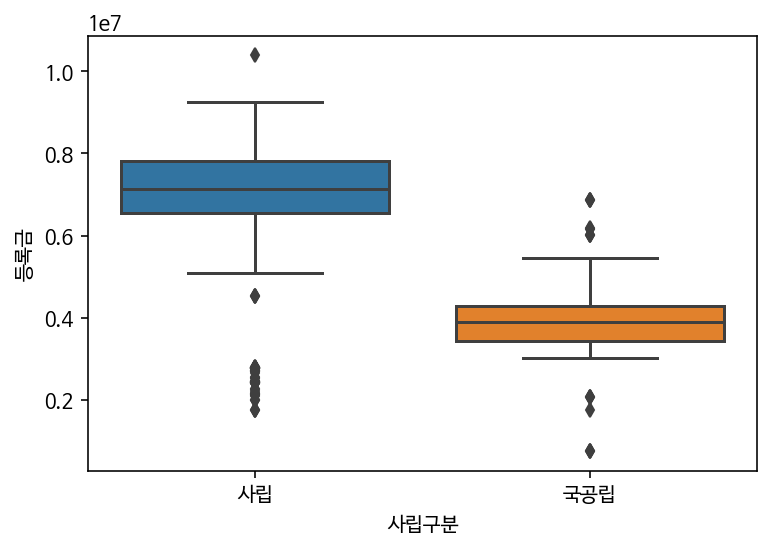

In [106]:
sns.boxplot(x='사립구분', y='등록금', data=df)
plt.show()

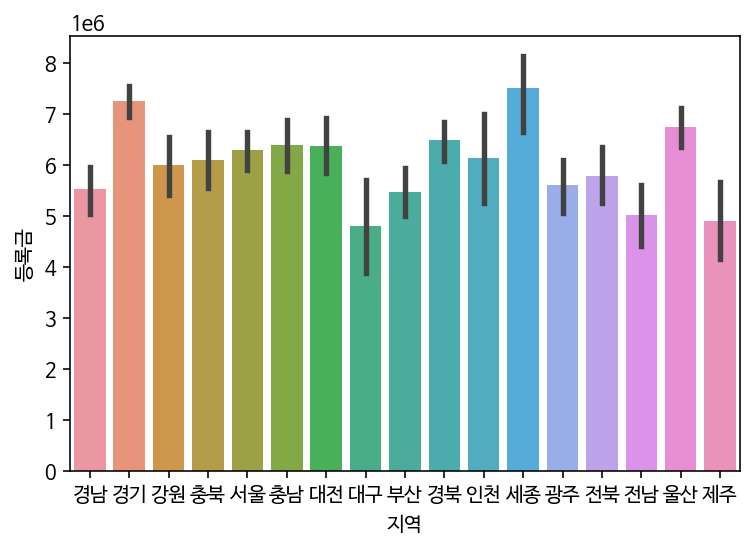

In [107]:
sns.barplot(x='지역', y='등록금', data=df)
plt.show()

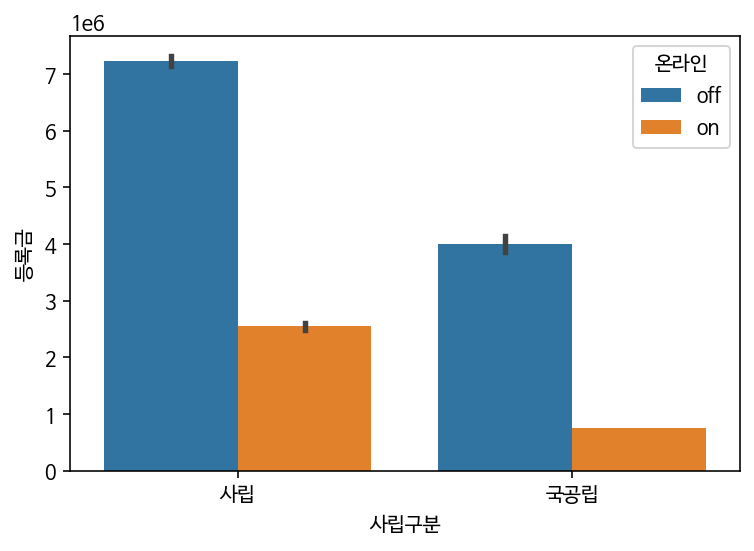

In [108]:
sns.barplot(x='사립구분', y='등록금',hue='온라인', data=df)
plt.show()

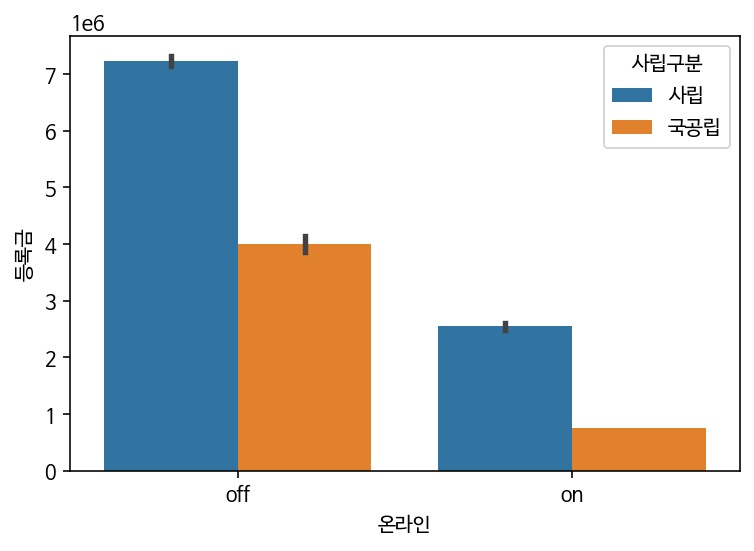

In [110]:
sns.barplot(x='온라인', y='등록금',hue='사립구분', data=df)
plt.show()

### 수치형 + 수치형

In [111]:
dfn = df.loc[:,'등록금':]
dfn.head()

,등록금,인문사회,자연과학,예체능,공학,의학,온라인,사립구분
0,6717700.00,5973300.00,7198400.00,nan,nan,nan,off,사립
1,8232500.00,7104500.00,8274800.00,9173100.00,9076000.00,9768000.00,off,사립
2,7183400.00,6157400.00,7438700.00,8214300.00,8135400.00,9850000.00,off,사립
3,7054300.00,6618000.00,7796000.00,nan,nan,nan,off,사립
4,6919800.00,6122000.00,7457400.00,8562000.00,8284000.00,nan,off,사립


In [112]:
def scplot(col) : 
  sns.scatterplot(x='등록금', y=col, hue='사립구분', data=dfn)
  plt.show()

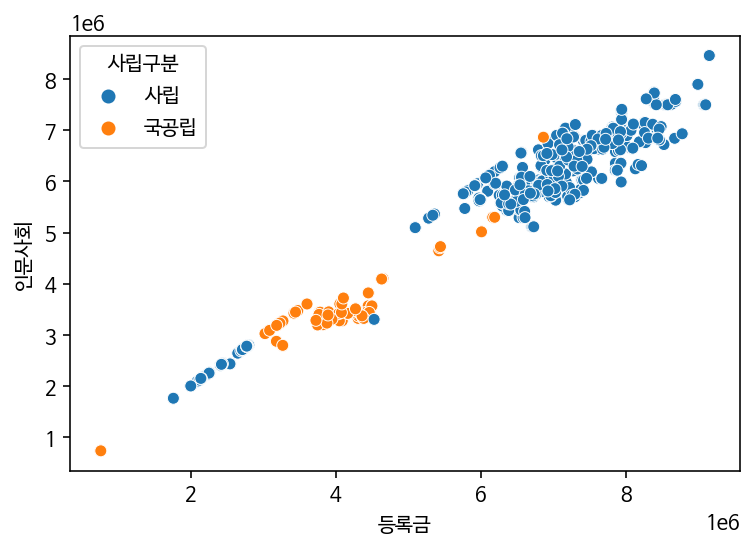

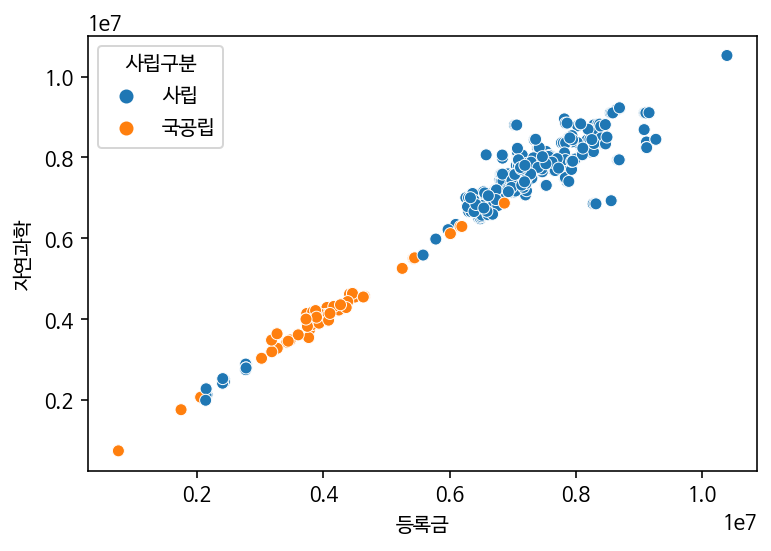

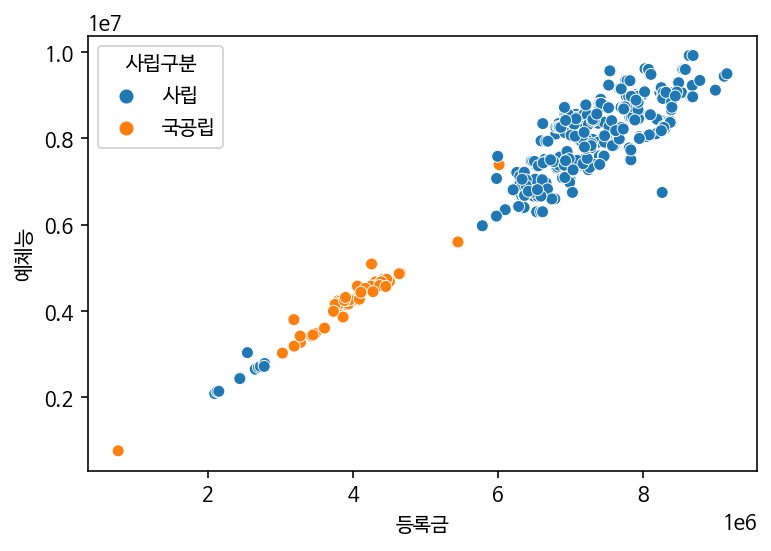

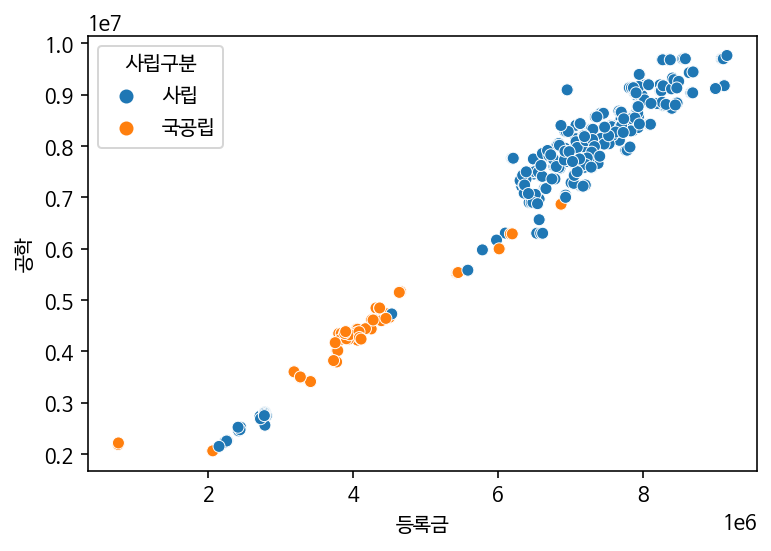

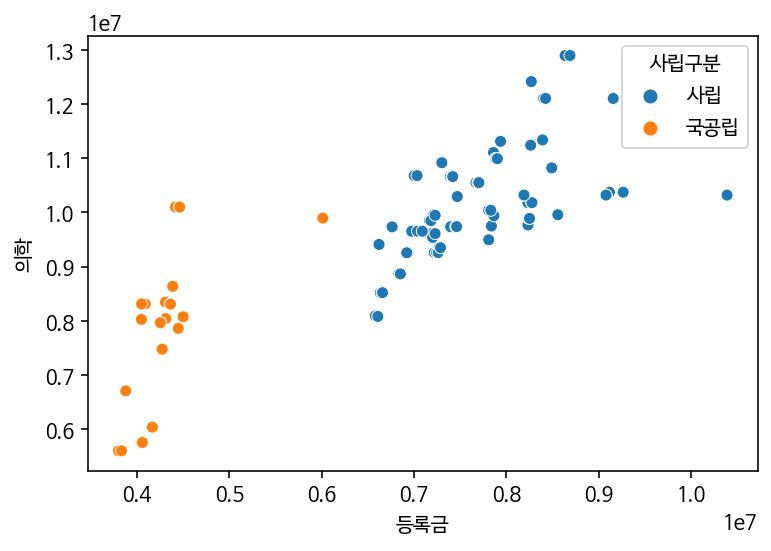

In [113]:
for col in dfn.columns[1:6] :
  scplot(col)

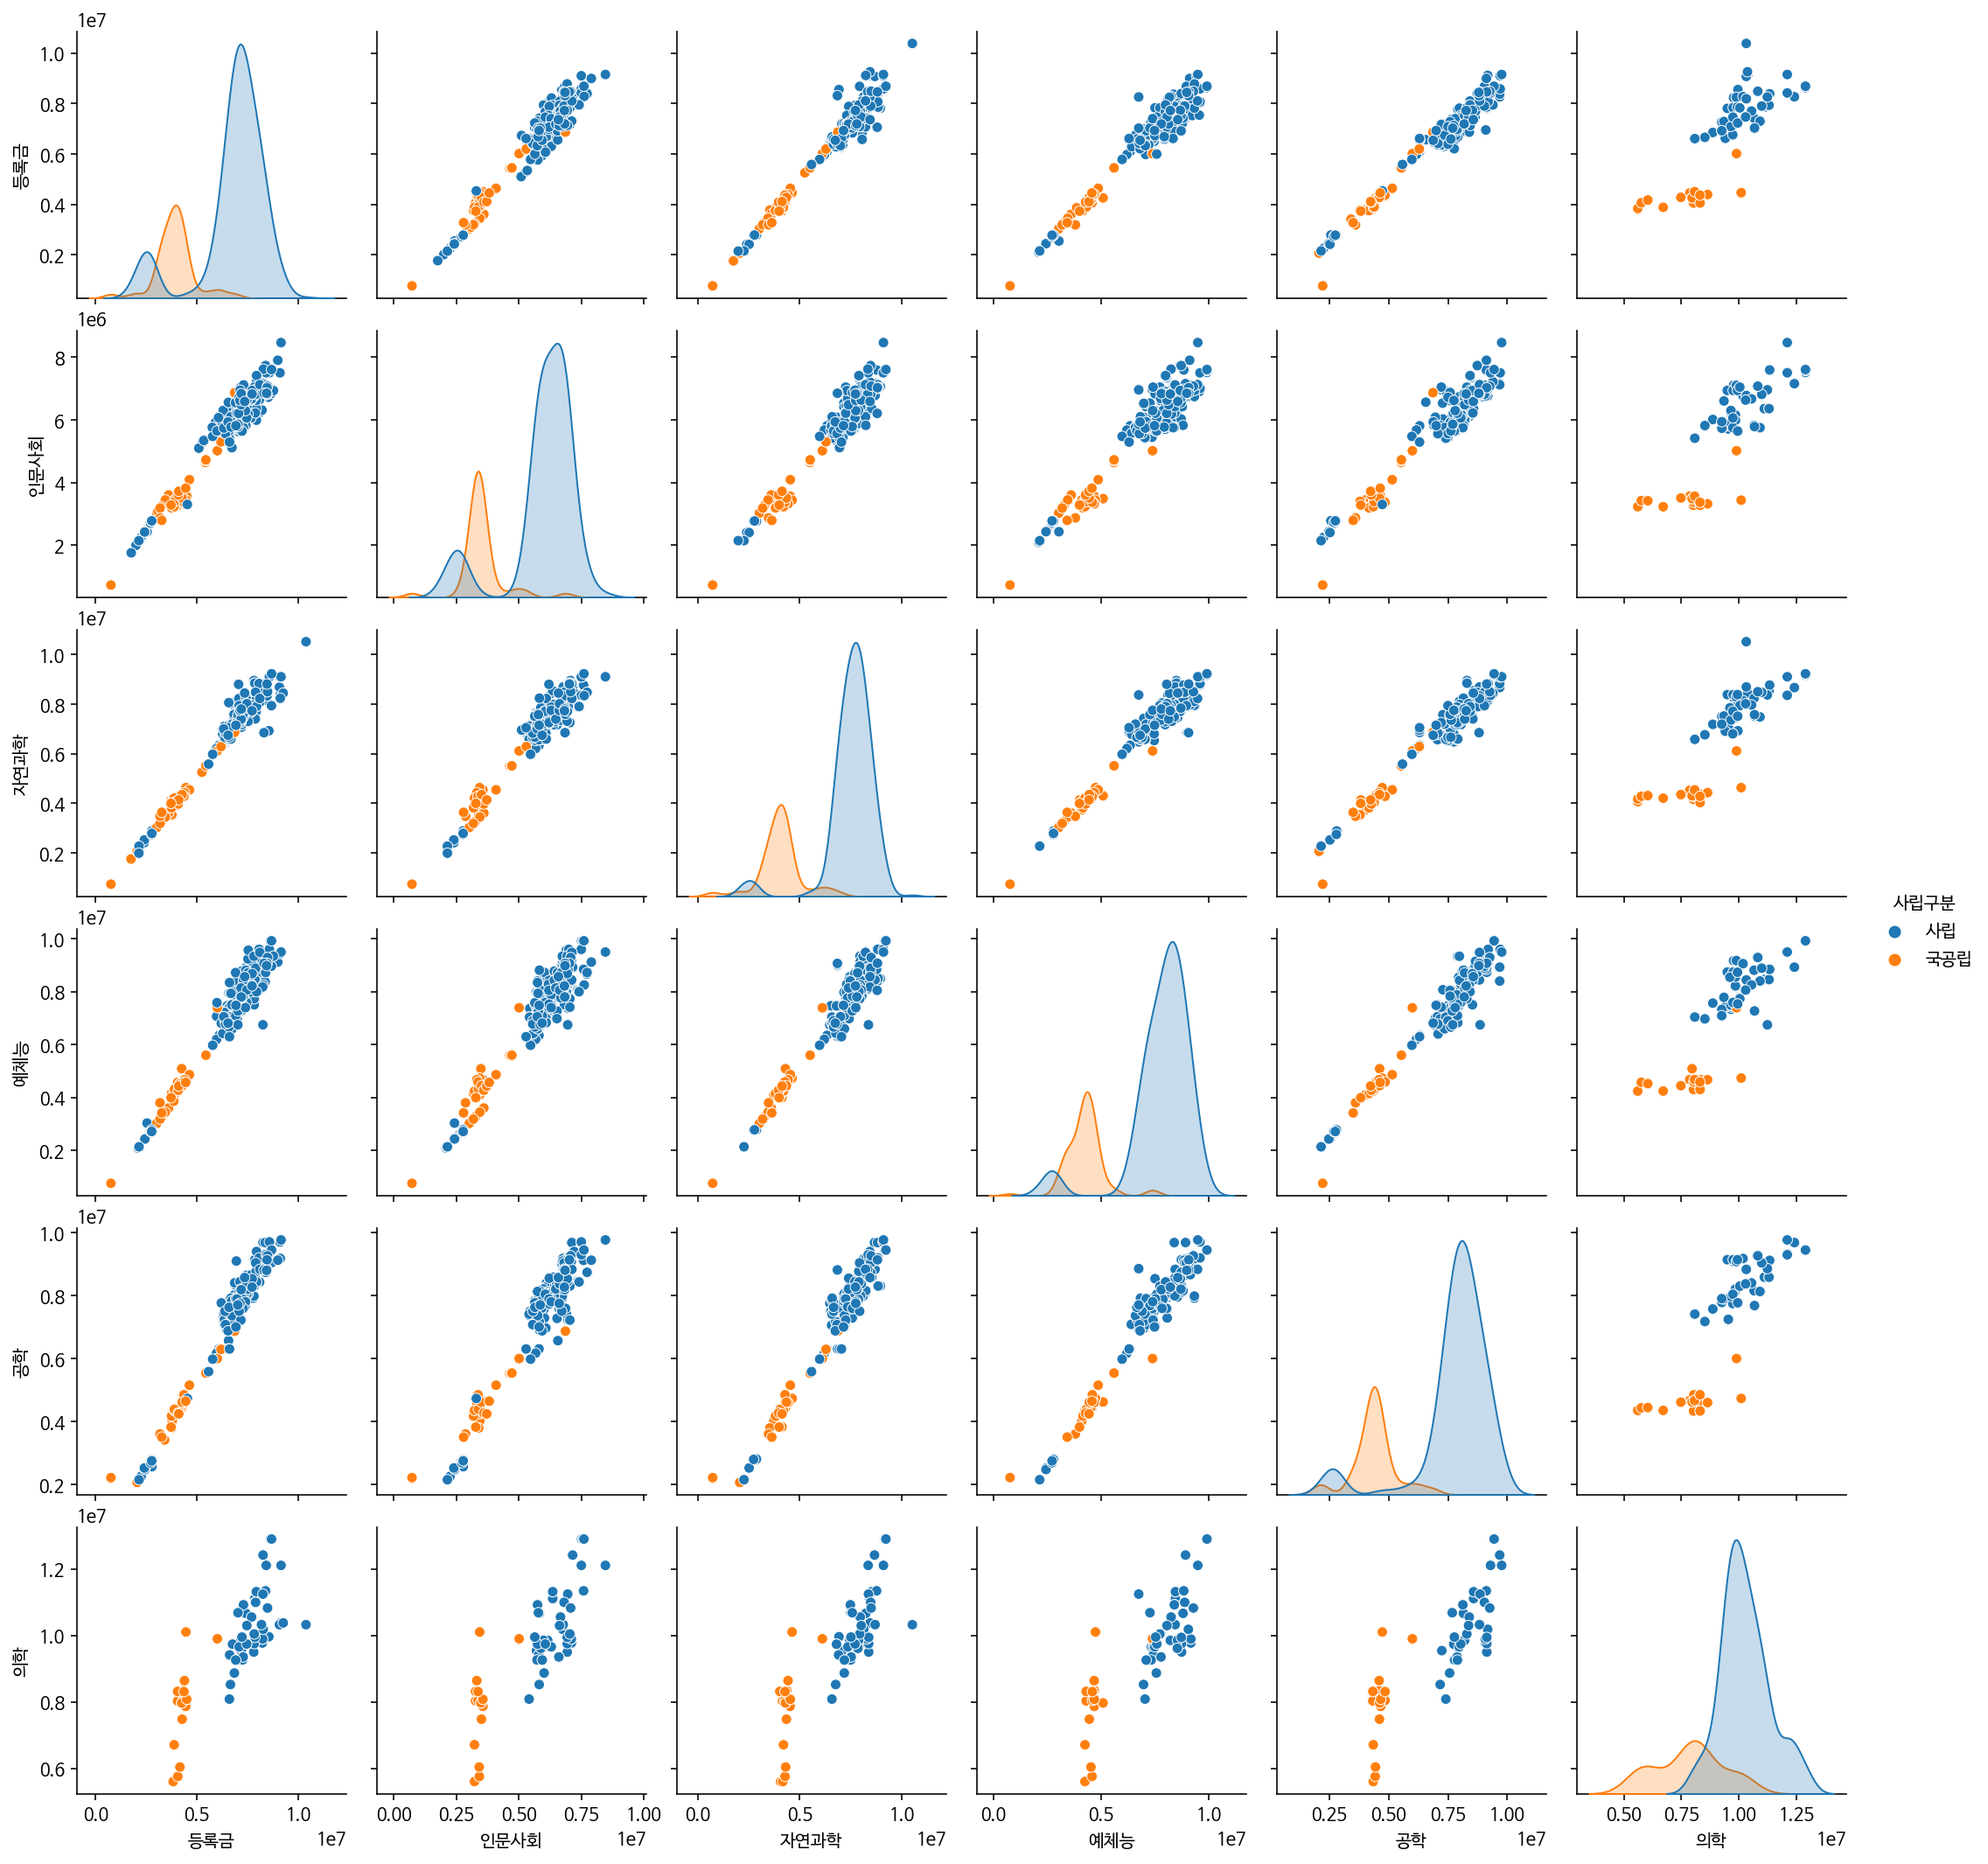

In [114]:
sns.pairplot(data=dfn, hue='사립구분')
plt.show()

+ 상관관계 해석
  + 0.0 <= |r| < 0.2 : 상관관계가 없다. = 선형의 관계가 없다.
  + 0.2 <= |r| < 0.4 : 약한 상관관계가 있다.
  + 0.4 <= |r| < 0.6 : 보통의 상관관계가 있다.
  + 0.6 <= |r| < 0.8 : 강한 (높은) 상관관계가 있다.
  + 0.8 <= |r| <= 1.0 : 매우 강한 (매우 높은) 상관관계가 있다.

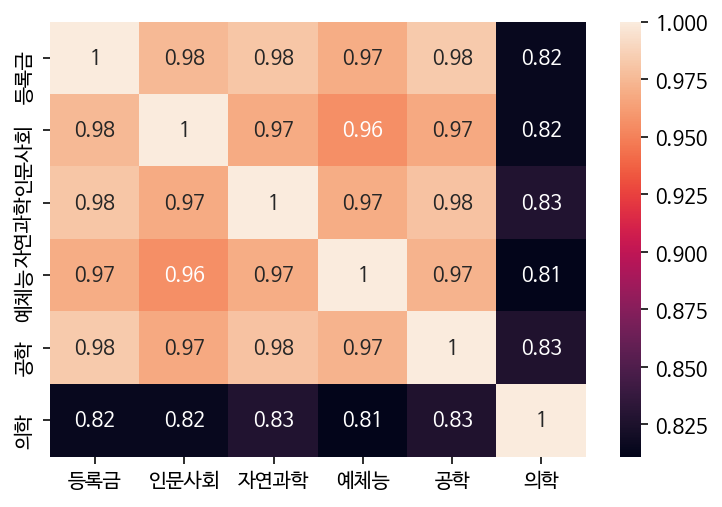

In [115]:
sns.heatmap(dfn.iloc[:, :-2].corr(), annot=True)
plt.show()

## 데이터 요약


### 피봇테이블(pivot table)
+ 데이터 열 중에서 두 개의 열을 각각 행 인덱스, 열 인덱스로 사용하여 데이터를 조회
+ df.pivot_table(values='분석할열', index='행', columns='열', aggfunc='적용함수')

In [116]:
df.columns

Index(['기준연도', '학교종류', '설립구분', '지역', '상태', '학교', '입학금', '수업료', '등록금', '인문사회',
       '자연과학', '예체능', '공학', '의학', '온라인', '사립구분'],
      dtype='object')

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 732
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준연도    720 non-null    int64  
 1   학교종류    720 non-null    object 
 2   설립구분    720 non-null    object 
 3   지역      720 non-null    object 
 4   상태      720 non-null    object 
 5   학교      720 non-null    object 
 6   입학금     555 non-null    float64
 7   수업료     720 non-null    float64
 8   등록금     720 non-null    float64
 9   인문사회    682 non-null    float64
 10  자연과학    546 non-null    float64
 11  예체능     548 non-null    float64
 12  공학      509 non-null    float64
 13  의학      140 non-null    float64
 14  온라인     720 non-null    object 
 15  사립구분    717 non-null    object 
dtypes: float64(8), int64(1), object(7)
memory usage: 115.6+ KB


In [118]:
dfv = df.pivot_table(values='등록금', index='기준연도', columns='사립구분', aggfunc='mean')
dfv

사립구분,국공립,사립
기준연도,,
2019,3924636.17,6794586.46
2020,3885254.37,6806556.47
2021,3960451.82,6829005.79


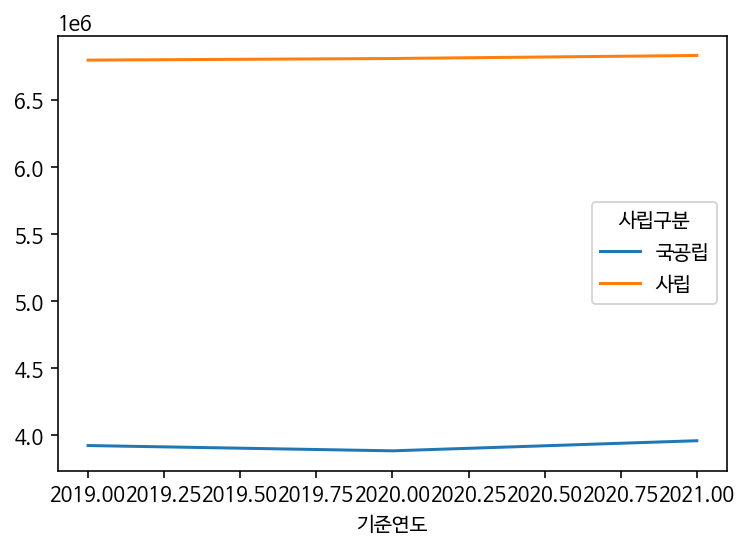

In [119]:
dfv.plot()
plt.show()

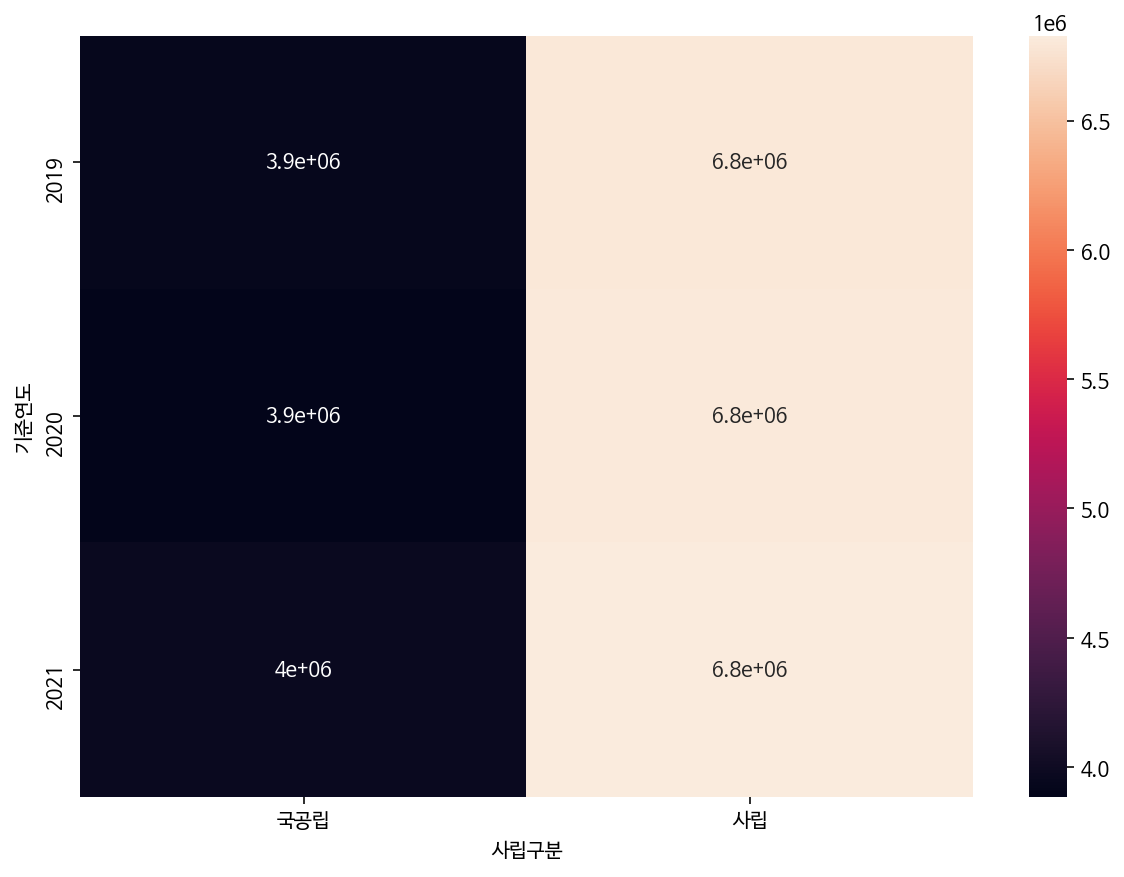

In [120]:
plt.figure(figsize=(10,7))
sns.heatmap(dfv, annot=True)
plt.show()

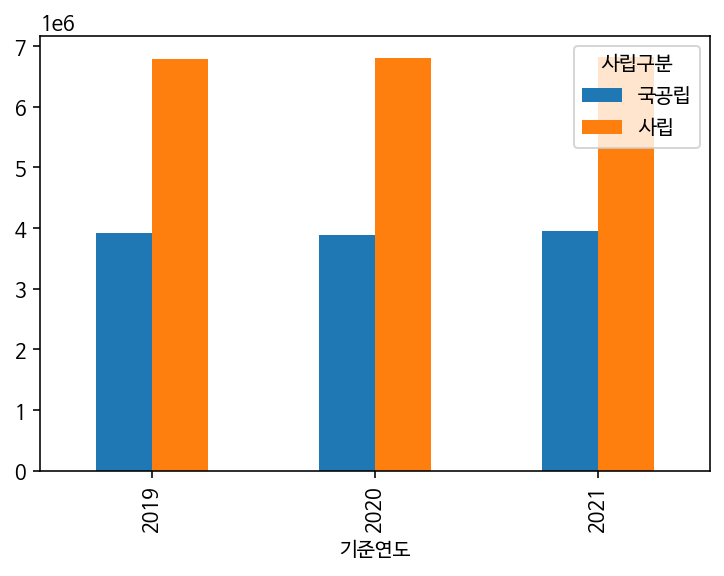

In [121]:
dfv.plot(kind='bar')
plt.show()

### group by 
+ 데이터 그룹을 이루는 경우에는 그룹의 특성

In [122]:
dfg = df.groupby(['기준연도', '사립구분'])['등록금'].mean()
dfg = dfg.to_frame()
dfg

등록금
기준연도 사립구분           
2019 국공립  3924636.17
     사립   6794586.46
2020 국공립  3885254.37
     사립   6806556.47
2021 국공립  3960451.82
     사립   6829005.79

In [123]:
dfg = dfg.reset_index()
dfg

,기준연도,사립구분,등록금
0,2019,국공립,3924636.17
1,2019,사립,6794586.46
2,2020,국공립,3885254.37
3,2020,사립,6806556.47
4,2021,국공립,3960451.82
5,2021,사립,6829005.79


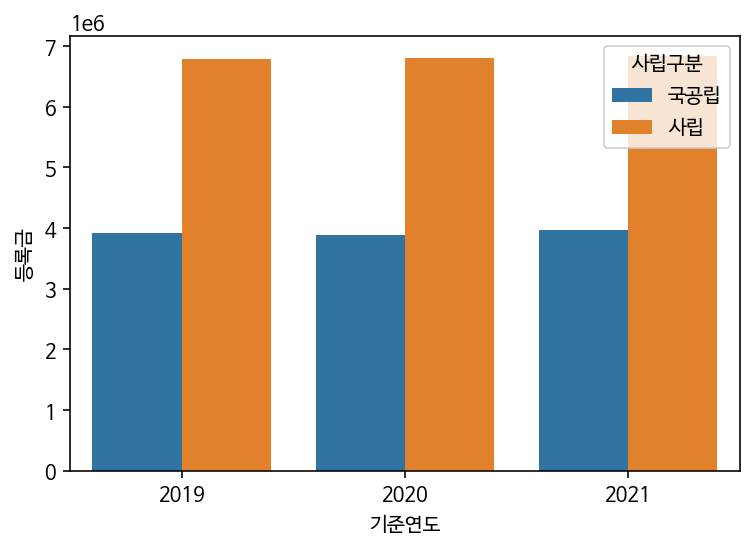

In [124]:
sns.barplot(x='기준연도', y='등록금', hue='사립구분', data=dfg)
plt.show()

## 데이터 저장

In [127]:
df.head(2)

,기준연도,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학,온라인,사립구분
0,2019,대학교,사립,경남,기존,가야대학교(김해),360000.00,6717700.00,6717700.00,5973300.00,7198400.00,nan,nan,nan,off,사립
1,2019,대학교,사립,경기,기존,가천대학교,601000.00,8232500.00,8232500.00,7104500.00,8274800.00,9173100.00,9076000.00,9768000.00,off,사립


In [128]:
df.to_csv('/content/drive/MyDrive/2021_AI/data/등록금eda.csv', index=False)